In [229]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from lightgbm.sklearn import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
df = pd.read_csv("/Users/yangdongjae/Desktop/2020/대외활동/2020년 공공 빅데이터 청년 인턴십/실무형 프로젝트/roundabout_project/data/전국사고csv.csv" , encoding = "cp949")

In [231]:
df = df.sort_values(by='OCCU_DATE')

df

,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,OCCU_DATE,LCLAS,SCLAS,DEATH,...,DRNKG,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,X,Y
374001,374002,2016,1,1,15,금요일,20160101,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전운전 의무 불이행,41,41390,41390132,14101381.29,4485290.013
246657,246658,2016,1,1,22,금요일,20160101,경상사고,차대사람,0,...,NaN,NaN,NaN,O,보행자 보호의무 위반,30,30170,30170104,14178369.07,4342177.908
614900,614901,2016,1,1,0,금요일,20160101,경상사고,차대사람,0,...,NaN,NaN,NaN,O,안전운전 의무 불이행,48,48170,48170113,14257456.44,4190438.892
153781,153782,2016,1,1,6,금요일,20160101,중상사고,차대사람,0,...,NaN,NaN,NaN,O,신호위반,27,27110,27110105,14315581.57,4282380.047
428124,428125,2016,1,1,18,금요일,20160101,경상사고,차대차,0,...,O,NaN,NaN,NaN,중앙선 침범,41,41800,41800250,14148226.25,4600332.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230788,230789,2018,12,31,17,월요일,20181231,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,교차로 통행방법 위반,29,29170,29170114,14129957.47,4187905.719
640579,640580,2018,12,31,8,월요일,20181231,중상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전운전 의무 불이행,48,48880,48880250,14238381.95,4256520.001
295758,295759,2018,12,31,20,월요일,20181231,중상사고,차량단독,0,...,NaN,NaN,NaN,NaN,기타,41,41133,41133103,14155456.33,4502079.574
20787,20788,2018,12,31,3,월요일,20181231,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전거리 미확보,11,11230,11230105,14143800.82,4518186.116


In [232]:
df = df.reset_index()
df = df.drop('index', axis =1)

In [239]:
# df_2016 = df.loc[df['OCCU_YEAR']==2016,:]
# df_2017 = df.loc[df["OCCU_YEAR"]==2017, :]
# df_2018 = df.loc[df["OCCU_YEAR"]==2018, :]

train = df[df['OCCU_YEAR']!= 2018]
test = df[df['OCCU_YEAR'] == 2018]


In [244]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437226 entries, 0 to 437225
Data columns (total 23 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   OBJT_ID    437226 non-null  int64  
 1   OCCU_YEAR  437226 non-null  int64  
 2   OCCU_MT    437226 non-null  int64  
 3   OCCU_DE    437226 non-null  int64  
 4   OCCU_TM    437226 non-null  int64  
 5   OCCU_DAY   437226 non-null  object 
 6   OCCU_DATE  437226 non-null  int64  
 7   LCLAS      437226 non-null  object 
 8   SCLAS      437226 non-null  object 
 9   DEATH      437226 non-null  int64  
 10  SWPSN      437226 non-null  int64  
 11  SINJPSN    437226 non-null  int64  
 12  INJPSN     437226 non-null  int64  
 13  DRNKG      39285 non-null   object 
 14  KID        26788 non-null   object 
 15  ODSN       73310 non-null   object 
 16  WLKG       96606 non-null   object 
 17  VIOLT_CN   437226 non-null  object 
 18  CTPRVN_CD  437226 non-null  int64  
 19  SGG_CD     437226 non-n

In [243]:
train.head()

,OBJT_ID,OCCU_YEAR,OCCU_MT,OCCU_DE,OCCU_TM,OCCU_DAY,OCCU_DATE,LCLAS,SCLAS,DEATH,...,DRNKG,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,X,Y
0,374002,2016,1,1,15,금요일,20160101,경상사고,차대차,0,...,NaN,NaN,NaN,NaN,안전운전 의무 불이행,41,41390,41390132,14101381.29,4485290.013
1,246658,2016,1,1,22,금요일,20160101,경상사고,차대사람,0,...,NaN,NaN,NaN,O,보행자 보호의무 위반,30,30170,30170104,14178369.07,4342177.908
2,614901,2016,1,1,0,금요일,20160101,경상사고,차대사람,0,...,NaN,NaN,NaN,O,안전운전 의무 불이행,48,48170,48170113,14257456.44,4190438.892
3,153782,2016,1,1,6,금요일,20160101,중상사고,차대사람,0,...,NaN,NaN,NaN,O,신호위반,27,27110,27110105,14315581.57,4282380.047
4,428125,2016,1,1,18,금요일,20160101,경상사고,차대차,0,...,O,NaN,NaN,NaN,중앙선 침범,41,41800,41800250,14148226.25,4600332.293


In [245]:
train.columns

Index(['OBJT_ID', 'OCCU_YEAR', 'OCCU_MT', 'OCCU_DE', 'OCCU_TM', 'OCCU_DAY',
       'OCCU_DATE', 'LCLAS', 'SCLAS', 'DEATH', 'SWPSN', 'SINJPSN', 'INJPSN',
       'DRNKG', 'KID', 'ODSN', 'WLKG', 'VIOLT_CN', 'CTPRVN_CD', 'SGG_CD',
       'EMD_CD', 'X', 'Y'],
      dtype='object')

In [246]:
train.drop(columns = ['OCCU_YEAR', 'OCCU_MT', 'OCCU_DE', 'OCCU_TM'] , inplace = True)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [250]:
train.drop(columns = ['OCCU_DATE'], inplace = True)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [253]:
le = LabelEncoder()
train['OCCU_DAY'] = le.fit_transform(train['OCCU_DAY'])
train.head()

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,OBJT_ID,OCCU_DAY,LCLAS,SCLAS,DEATH,SWPSN,SINJPSN,INJPSN,DRNKG,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,X,Y
0,374002,0,경상사고,차대차,0,0,5,0,NaN,NaN,NaN,NaN,안전운전 의무 불이행,41,41390,41390132,14101381.29,4485290.013
1,246658,0,경상사고,차대사람,0,0,1,0,NaN,NaN,NaN,O,보행자 보호의무 위반,30,30170,30170104,14178369.07,4342177.908
2,614901,0,경상사고,차대사람,0,0,1,0,NaN,NaN,NaN,O,안전운전 의무 불이행,48,48170,48170113,14257456.44,4190438.892
3,153782,0,중상사고,차대사람,0,1,1,0,NaN,NaN,NaN,O,신호위반,27,27110,27110105,14315581.57,4282380.047
4,428125,0,경상사고,차대차,0,0,1,0,O,NaN,NaN,NaN,중앙선 침범,41,41800,41800250,14148226.25,4600332.293


In [256]:
train.columns

Index(['OBJT_ID', 'OCCU_DAY', 'LCLAS', 'SCLAS', 'DEATH', 'SWPSN', 'SINJPSN',
       'INJPSN', 'DRNKG', 'KID', 'ODSN', 'WLKG', 'VIOLT_CN', 'CTPRVN_CD',
       'SGG_CD', 'EMD_CD', 'X', 'Y'],
      dtype='object')

In [259]:
train_x = train.drop(columns = ['X','Y','CTPRVN_CD','SGG_CD', 'EMD_CD','DEATH', 'SWPSN', 'SINJPSN',
       'INJPSN'])

train_x

,OBJT_ID,OCCU_DAY,LCLAS,SCLAS,DRNKG,KID,ODSN,WLKG,VIOLT_CN
0,374002,0,경상사고,차대차,NaN,NaN,NaN,NaN,안전운전 의무 불이행
1,246658,0,경상사고,차대사람,NaN,NaN,NaN,O,보행자 보호의무 위반
2,614901,0,경상사고,차대사람,NaN,NaN,NaN,O,안전운전 의무 불이행
3,153782,0,중상사고,차대사람,NaN,NaN,NaN,O,신호위반
4,428125,0,경상사고,차대차,O,NaN,NaN,NaN,중앙선 침범
...,...,...,...,...,...,...,...,...,...
437221,257864,4,경상사고,차대차,O,NaN,NaN,NaN,중앙선 침범
437222,421059,4,중상사고,차대차,NaN,NaN,NaN,NaN,안전운전 의무 불이행
437223,471046,4,중상사고,차대차,NaN,NaN,NaN,NaN,안전운전 의무 불이행
437224,506705,4,경상사고,차대차,O,O,NaN,NaN,신호위반


In [262]:
train_x.fillna('X',inplace = True)
train_x

,OBJT_ID,OCCU_DAY,LCLAS,SCLAS,DRNKG,KID,ODSN,WLKG,VIOLT_CN
0,374002,0,경상사고,차대차,X,X,X,X,안전운전 의무 불이행
1,246658,0,경상사고,차대사람,X,X,X,O,보행자 보호의무 위반
2,614901,0,경상사고,차대사람,X,X,X,O,안전운전 의무 불이행
3,153782,0,중상사고,차대사람,X,X,X,O,신호위반
4,428125,0,경상사고,차대차,O,X,X,X,중앙선 침범
...,...,...,...,...,...,...,...,...,...
437221,257864,4,경상사고,차대차,O,X,X,X,중앙선 침범
437222,421059,4,중상사고,차대차,X,X,X,X,안전운전 의무 불이행
437223,471046,4,중상사고,차대차,X,X,X,X,안전운전 의무 불이행
437224,506705,4,경상사고,차대차,O,O,X,X,신호위반


In [265]:
train_x['LCLAS'] = le.fit_transform(train_x["LCLAS"])
train_x['SCLAS'] = le.fit_transform(train_x["SCLAS"])
train_x['VIOLT_CN'] = le.fit_transform(train_x["VIOLT_CN"])

train_x

,OBJT_ID,OCCU_DAY,LCLAS,SCLAS,DRNKG,KID,ODSN,WLKG,VIOLT_CN
0,374002,0,0,2,X,X,X,X,6
1,246658,0,0,1,X,X,X,O,3
2,614901,0,0,1,X,X,X,O,6
3,153782,0,3,1,X,X,X,O,4
4,428125,0,0,2,O,X,X,X,7
...,...,...,...,...,...,...,...,...,...
437221,257864,4,0,2,O,X,X,X,7
437222,421059,4,3,2,X,X,X,X,6
437223,471046,4,3,2,X,X,X,X,6
437224,506705,4,0,2,O,O,X,X,4


In [266]:
pd.get_dummies(train_x)

,OBJT_ID,OCCU_DAY,LCLAS,SCLAS,VIOLT_CN,DRNKG_O,DRNKG_X,KID_O,KID_X,ODSN_O,ODSN_X,WLKG_O,WLKG_X
0,374002,0,0,2,6,0,1,0,1,0,1,0,1
1,246658,0,0,1,3,0,1,0,1,0,1,1,0
2,614901,0,0,1,6,0,1,0,1,0,1,1,0
3,153782,0,3,1,4,0,1,0,1,0,1,1,0
4,428125,0,0,2,7,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437221,257864,4,0,2,7,1,0,0,1,0,1,0,1
437222,421059,4,3,2,6,0,1,0,1,0,1,0,1
437223,471046,4,3,2,6,0,1,0,1,0,1,0,1
437224,506705,4,0,2,4,1,0,1,0,0,1,0,1


In [267]:
train.head()

,OBJT_ID,OCCU_DAY,LCLAS,SCLAS,DEATH,SWPSN,SINJPSN,INJPSN,DRNKG,KID,ODSN,WLKG,VIOLT_CN,CTPRVN_CD,SGG_CD,EMD_CD,X,Y
0,374002,0,경상사고,차대차,0,0,5,0,NaN,NaN,NaN,NaN,안전운전 의무 불이행,41,41390,41390132,14101381.29,4485290.013
1,246658,0,경상사고,차대사람,0,0,1,0,NaN,NaN,NaN,O,보행자 보호의무 위반,30,30170,30170104,14178369.07,4342177.908
2,614901,0,경상사고,차대사람,0,0,1,0,NaN,NaN,NaN,O,안전운전 의무 불이행,48,48170,48170113,14257456.44,4190438.892
3,153782,0,중상사고,차대사람,0,1,1,0,NaN,NaN,NaN,O,신호위반,27,27110,27110105,14315581.57,4282380.047
4,428125,0,경상사고,차대차,0,0,1,0,O,NaN,NaN,NaN,중앙선 침범,41,41800,41800250,14148226.25,4600332.293


In [269]:
train_y = train[['DEATH','SWPSN','SINJPSN','INJPSN']].sum(axis = 1)
train_y

0         5
1         1
2         1
3         2
4         1
         ..
437221    1
437222    3
437223    4
437224    8
437225    3
Length: 437226, dtype: int64

In [274]:
train_x.drop(columns = ['OBJT_ID'] , inplace = True)

In [277]:
test_y = test[['DEATH','SWPSN','SINJPSN','INJPSN']].sum(axis = 1)
test_y

437226    1
437227    2
437228    3
437229    1
437230    1
         ..
654354    2
654355    1
654356    1
654357    1
654358    1
Length: 217133, dtype: int64

In [278]:
test.columns

Index(['OBJT_ID', 'OCCU_YEAR', 'OCCU_MT', 'OCCU_DE', 'OCCU_TM', 'OCCU_DAY',
       'OCCU_DATE', 'LCLAS', 'SCLAS', 'DEATH', 'SWPSN', 'SINJPSN', 'INJPSN',
       'DRNKG', 'KID', 'ODSN', 'WLKG', 'VIOLT_CN', 'CTPRVN_CD', 'SGG_CD',
       'EMD_CD', 'X', 'Y'],
      dtype='object')

In [280]:
test.drop(columns = ['OCCU_YEAR', 'OCCU_MT', 'OCCU_DE', 'OCCU_TM','DEATH', 'SWPSN', 'SINJPSN', 'INJPSN','CTPRVN_CD', 'SGG_CD',
       'EMD_CD', 'X', 'Y'] , inplace = True)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [283]:
test.drop(columns=['OBJT_ID'], inplace = True)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [285]:
test.drop(columns=['OCCU_DATE'], inplace = True)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [286]:
test.head()

,OCCU_DAY,LCLAS,SCLAS,DRNKG,KID,ODSN,WLKG,VIOLT_CN
437226,월요일,중상사고,차대사람,NaN,NaN,NaN,O,보행자 보호의무 위반
437227,월요일,경상사고,차대차,NaN,NaN,NaN,NaN,안전거리 미확보
437228,월요일,중상사고,차대차,NaN,NaN,NaN,NaN,중앙선 침범
437229,월요일,경상사고,차대사람,NaN,NaN,NaN,O,안전운전 의무 불이행
437230,월요일,경상사고,차대사람,NaN,NaN,O,O,보행자 보호의무 위반


In [287]:
test['OCCU_DAY'] = le.fit_transform(test['OCCU_DAY'])
test['LCLAS'] = le.fit_transform(test['LCLAS'])
test['SCLAS'] = le.fit_transform(test['SCLAS'])
test['VIOLT_CN'] = le.fit_transform(test['VIOLT_CN'])

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [293]:
test.fillna('X' ,inplace = True)

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [296]:
test_x = pd.get_dummies(test)

In [302]:
test_x

,OCCU_DAY,LCLAS,SCLAS,VIOLT_CN,DRNKG_O,DRNKG_X,KID_O,KID_X,ODSN_O,ODSN_X,WLKG_O,WLKG_X
437226,3,3,0,3,0,1,0,1,0,1,1,0
437227,3,0,1,5,0,1,0,1,0,1,0,1
437228,3,3,1,7,0,1,0,1,0,1,0,1
437229,3,0,0,6,0,1,0,1,0,1,1,0
437230,3,0,0,3,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
654354,3,0,1,1,0,1,0,1,0,1,0,1
654355,3,3,1,6,0,1,0,1,0,1,0,1
654356,3,3,2,2,0,1,0,1,0,1,0,1
654357,3,0,1,5,0,1,0,1,0,1,0,1


In [306]:
train_x = pd.get_dummies(train_x)

In [307]:
lgbm = LGBMRegressor()
rf= RandomForestRegressor()

In [308]:
from sklearn.model_selection import KFold,cross_val_score
def rmse_cv(model):
    n_fold = 10
    kf = KFold(n_fold, shuffle=True,random_state=42).get_n_splits(train_x)
    rmse = np.sqrt(-cross_val_score(model,train_x.values,train_y,scoring='neg_mean_squared_error',cv=kf))
    return rmse

In [309]:
print("교차 검증 점수: {}".format(np.mean(rmse_cv(lgbm))))

print("교차 검증 점수: {}".format(np.mean(rmse_cv(rf))))

교차 검증 점수: 1.0742333547469964


/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Use

교차 검증 점수: 1.0898825817054534


In [310]:
from sklearn.metrics import mean_squared_error
lgbm.fit(train_x,train_y)
pred = lgbm.predict(test_x)
mean_squared_error(test_y,pred)



1.3172311512066683

In [312]:
np.sqrt(mean_squared_error(test_y,pred))

1.1477069099760044

In [314]:
rf.fit(train_x , train_y)
pred2 = rf.predict(test_x)
mean_squared_error(test_y,pred2)
np.sqrt(mean_squared_error(test_y,pred2))

/Users/yangdongjae/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.1552311647557245

In [ ]:
# %time
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(lgbm, train_x, train_y)

# print("교차 검증 점수: {}".format(scores))

# scores = cross_val_score(lgbm, train_x, train_y, cv=5)

# print("교차 검증 점수: {}".format(scores))

In [ ]:
# from sklearn.model_selection import train_test_split
# train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=.2,random_state = 42)

# lgbm = LGBMRegressor()
# lgbm.fit(train_x,train_y)

In [ ]:
# pred = lgbm.predict(test_x)

# from sklearn.metrics import mean_squared_error
# mean_squared_error(test_y,pred)

In [315]:
rf.feature_importances_

array([0.08833169, 0.1270713 , 0.23584789, 0.08913608, 0.01974742,
       0.01197807, 0.12534233, 0.17725542, 0.06249344, 0.05261229,
       0.00582489, 0.00435918])

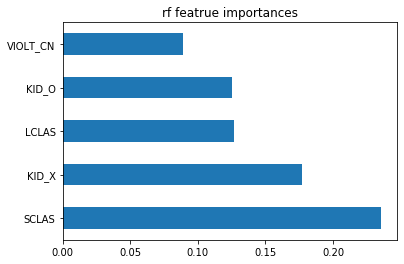

In [316]:
feat_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('rf featrue importances')
plt.show()